<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulaci-n-2/blob/main/Metropolis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALGORITMO METROPOLIS - HASTINGS

Vamos a progranar el algoritmo de metropolis

## TEOREMA DE LÍMITE CENTRAL

Si $X_1,X_2,...,X_n$ son son muestras aleatorias extraídas de una población con media global $\mu$ y varianza finita $\sigma^2$, y si $\bar{X}_n$ es la media muestral de las primeras $n$ muestras, entonces la forma límite de la distribución

$$Z=lim_{n \rightarrow ∞} \left(\frac{\bar{X}_n-μ}{\sigma_{\bar{X}}}\right) $$

con  $\sigma_{\bar{X}}=\frac{\sigma}{\sqrt{n}}$ es una distribución normal estandar.

## DISTRIBUCIÓN NORMAL
La distribución normal es una de las distribuciones de probabilidad de variable continua que se usa y aparece con más frecuencia en la estadística y teoriía de probabilidades.

Dicha distribución se define de la siguiente forma:

$$ f(x)=\frac{1}{\sigma\sqrt{2\pi}} \; exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

## CÓDIGO

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

In [90]:
def f(x,mu,std):
  return (1/np.sqrt(2*np.pi*std**2))*np.exp(-(x-mu)**2/(2*std**2))

La aceptación fue del  31.759999999999998 %


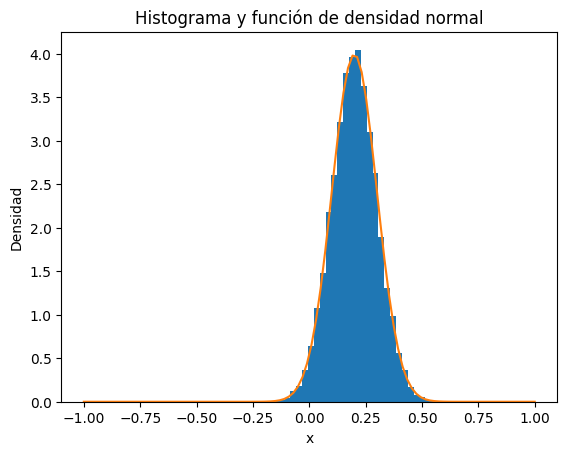

In [95]:
%matplotlib inline
# Parámetros
mu=0.2
sigma=0.1
delta=0.5

n=50000
x=np.zeros(n)
x[0]=0
accept=0

# Algoritmo de Metropolis-Hastings
for i in range(0,n-1):
  y=x[i]+np.random.uniform(-delta,delta)
  if np.random.rand()<min(1,f(y,mu,sigma)/f(x[i],mu,sigma)):
    x[i+1]=y
    accept=accept+1
  else:
    x[i+1]=x[i]
print("La aceptación fue del ", accept/n*100,"%")

#Graficas
plt.hist(x,density=True, bins=30)
xs=np.linspace(-1,1,100)
plt.plot(xs,f(xs,mu,sigma))
plt.title('Histograma y función de densidad normal')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.show()

In [96]:
df = pd.DataFrame({'PARAMETROS:': ['Media', 'Desviación Estándar'], 'MUESTRA': [np.mean(x), np.std(x)],'ANALÍTICA': [mu, sigma]})
print(df.to_string(index=False))

        PARAMETROS:  MUESTRA  ANALÍTICA
              Media 0.199637        0.2
Desviación Estándar 0.099824        0.1


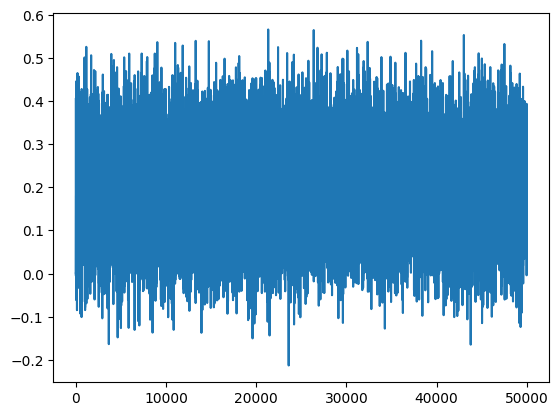

In [97]:
plt.plot(x)
plt.show()

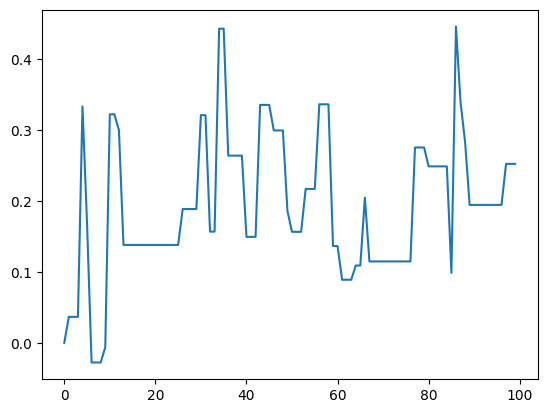

In [94]:
plt.plot(x[:100])
plt.show()

## DISTRIBUCIÓN DE CAUCHY

Es una distribución continua,pertenece a una  familia sencilla de distribuciones para las que no existe el valor esperado (y otros momentos).

Está dada por

$$f(x)= \frac{1}{\pi (1+x^2)}$$

#CÓDIGO

In [98]:
def cauchy(x,x0,ro):
  return (1/(np.pi*ro+(1+((x-x0)/ro)**2)))

La aceptación fue del  92.384 %


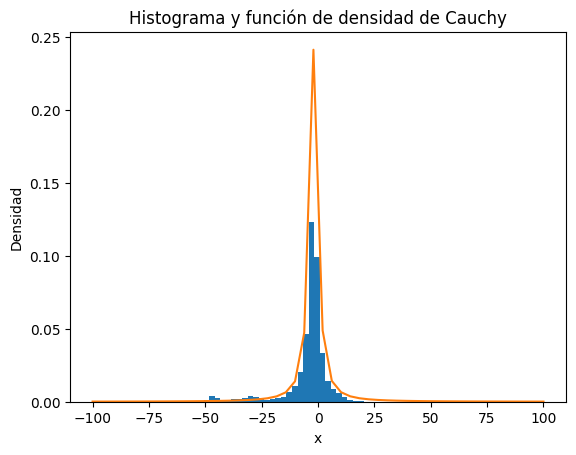

In [99]:
%matplotlib inline
x0=-2
ro=1
n=50000
x=np.zeros(n)
x[0]=0
accept=0

for i in range(0,n-1):
  y=x[i]+np.random.uniform(-ro,ro)
  if np.random.rand()<min(1,cauchy(y,x0,ro)/cauchy(x[i],x0,ro)):
    x[i+1]=y
    accept=accept+1
  else:
    x[i+1]=x[i]
print("La aceptación fue del ", accept/n*100,"%")
plt.hist(x,density=True, bins=30)
xs=np.linspace(-100,100)
plt.plot(xs,cauchy(xs,x0,ro))
plt.title('Histograma y función de densidad de Cauchy')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.show()

In [100]:
df = pd.DataFrame({'PARAMETROS:': ['Media', 'Desviación Estándar'], 'MUESTRA': [np.mean(x), np.std(x)],'ANALÍTICA': ["no definida", "no definida"]})
print(df.to_string(index=False))

        PARAMETROS:   MUESTRA   ANALÍTICA
              Media -4.482003 no definida
Desviación Estándar  9.840226 no definida


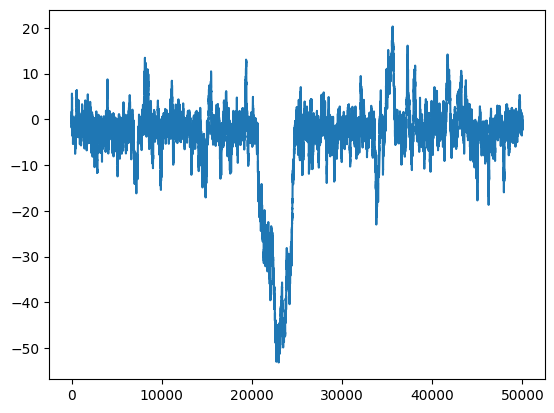

In [102]:
plt.plot(x)
plt.show()

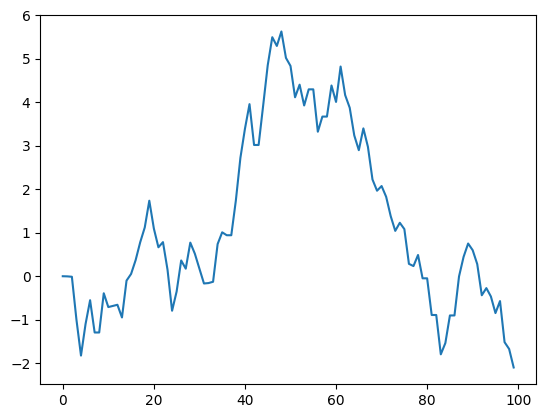

In [103]:
plt.plot(x[:100])
plt.show()

# DISTRIBUCIÓN EXPONENCIAL
La distribución exponencial es una distribución continua que se utiliza para modelar tiempos de espera para la ocurrencia de un cierto evento, tiene la propiedad de pérdida de memoria.

Se define de la siguiente  forma:

$$f(x)=\lambda e ^{-\lambda x}$$

# CÓDIGO

In [112]:
def exponencial(x, lambda_param):
    return lambda_param * np.exp(-lambda_param * x)

La aceptación fue del  62.56 %


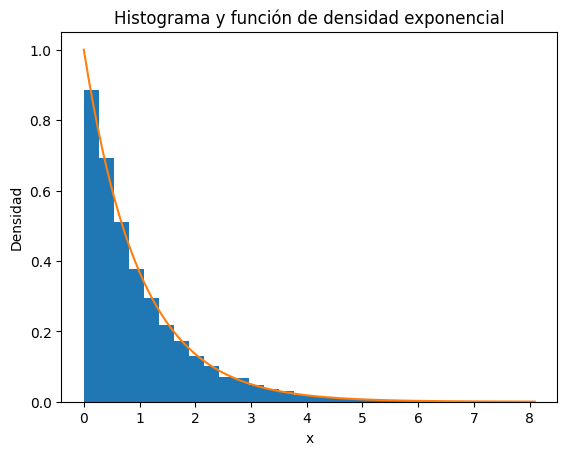

In [127]:

# Parámetros
lambda_param = 1


n = 50000
x = np.zeros(n)
x[0] = 0
accept = 0

# Algoritmo de Metropolis-Hastings
for i in range(0, n - 1):
    y=x[i]+np.random.uniform(-lambda_param, lambda_param)
    if y>=0:
        if np.random.rand()<min(1, exponencial(y,lambda_param)/exponencial(x[i],lambda_param)):
            x[i+1]=y
            accept+=1
        else:
            x[i+1]=x[i]
    else:
        x[i+1]=x[i]

print("La aceptación fue del ", accept/n*100, "%")
plt.hist(x, density=True, bins=30)

# Graficas
xs = np.linspace(0, np.max(x), 100)
plt.plot(xs, f_exponential(xs, lambda_param))
plt.title('Histograma y función de densidad exponencial')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.show()


In [128]:
df = pd.DataFrame({'PARAMETROS:': ['Media', 'Desviación Estándar'], 'MUESTRA': [np.mean(x), np.std(x)],'ANALÍTICA': [1/lambda_param, 1/lambda_param**2]})
print(df.to_string(index=False))

        PARAMETROS:  MUESTRA  ANALÍTICA
              Media 0.985654        1.0
Desviación Estándar 0.976001        1.0


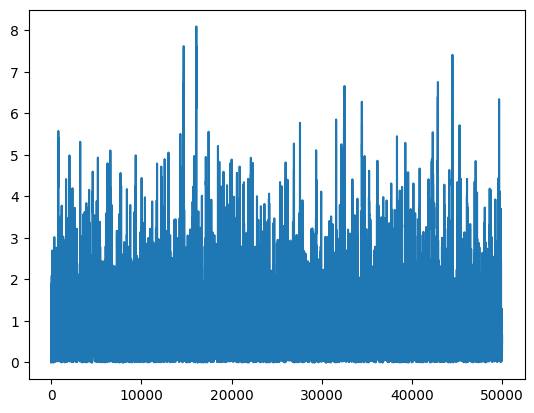

In [129]:
plt.plot(x)
plt.show()

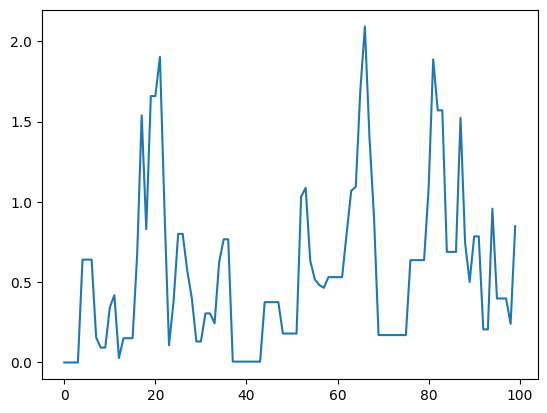

In [130]:
plt.plot(x[:100])
plt.show()